In [1]:
from lxml import etree
import bs4
import pandas as pd
import codecs
import pickle

In [2]:
%matplotlib inline
import matplotlib
import numpy as np
import matplotlib.pyplot as plt

In [3]:
finMT1=273300
debutMT2=324500

In [4]:
fichierTRS="/Users/gilles/Copy/Recherche/Rugby/France_Argentine_ANNOT-REF_essai.trs"

In [5]:
xmlTRS=etree.parse(fichierTRS)
if 0: print etree.tostring(xmlTRS)

In [6]:
rootTRS=xmlTRS.getroot()
if 0: print etree.tostring(rootTRS)

In [7]:
#timeLine=pd.DataFrame(columns=["début","fin","speaker","durée","texte","PxP","colour","support"])
timeLine=pd.DataFrame(columns=["début","fin","speaker","durée","texte"])

In [8]:
numSpk={1:1,2:1}
for turn in rootTRS.xpath('//Section[@type="report"]/Turn'):
    listeTour=[m.strip() for m in turn.xpath("./text()") if not m.strip() in ["","PAUSE"]]
    if listeTour:
        debut=100*float(turn.attrib["startTime"])
        fin=100*float(turn.attrib["endTime"])
        duree=fin-debut
        textTour= "\n".join(listeTour)
        timeCode=int(round(debut))
        if "speaker" in turn.attrib:
            speaker=turn.attrib['speaker']
            if " " in speaker:
                speaker="PB"
        elif timeCode in [231934]:
            speaker="spk1"
            print timeCode,textTour, "=>", speaker    
        elif timeCode in [157235,480978]:
            speaker="spk2"
            print timeCode,textTour, "=>", speaker    
        elif timeCode in [192333]:
            speaker="PB"
            print timeCode,textTour, "=>", speaker    
        else:
            speaker="PB"
            print timeCode,textTour
        timeLine.loc[timeCode]=(debut, fin, speaker, duree, textTour)

192333 hé oui avec Jauzion et => PB
231934 tonique euh il peut regardez cinq mètres derrière il peut continuer => spk1


In [10]:
def trancheTemps(duree):
    tranches=[i*100 for i in range(1,10)]
    for tranche in tranches:
        if duree<=tranche:
            return (tranche)/100

In [11]:
trancheTemps(168)

2

In [12]:
timeLine["dureeS1"]=timeLine[(timeLine["speaker"]=="spk1") & (timeLine["texte"].dropna())].apply(lambda x: trancheTemps(x["fin"]-x["début"]),axis=1)
timeLine["dureeS2"]=timeLine[(timeLine["speaker"]=="spk2") & (timeLine["texte"].dropna())].apply(lambda x: trancheTemps(x["fin"]-x["début"]),axis=1)

In [13]:
#timeLine[timeLine["speaker"]=="spk1"]
for duree in ["dureeS1","dureeS2"]:
    print duree, int(timeLine[duree].mean()), int(timeLine[duree].std())

dureeS1 2 1
dureeS2 2 1


## Moyennes et Ecart-types pour les durées de S1

In [15]:
print "Général\t",timeLine["dureeS1"].mean(),timeLine["dureeS1"].std()
print "MT1\t",timeLine[timeLine["début"]<finMT1]["dureeS1"].mean(),timeLine[timeLine["début"]<finMT1]["dureeS1"].std()
print "MT2\t",timeLine[timeLine["début"]>debutMT2]["dureeS1"].mean(),timeLine[timeLine["début"]>debutMT2]["dureeS1"].std()

Général	2.24388379205 1.04056995092
MT1	2.22765598651 1.05288089486
MT2	2.25734265734 1.03079267794


## Moyennes et Ecart-types pour les durées de S2

In [16]:
print "Général\t",timeLine["dureeS2"].mean(),timeLine["dureeS2"].std()
print "MT1\t",timeLine[timeLine["début"]<finMT1]["dureeS2"].mean(),timeLine[timeLine["début"]<finMT1]["dureeS2"].std()
print "MT2\t",timeLine[timeLine["début"]>debutMT2]["dureeS2"].mean(),timeLine[timeLine["début"]>debutMT2]["dureeS2"].std()

Général	2.55663430421 1.59644956529
MT1	2.56845238095 1.506627741
MT2	2.54255319149 1.69989466044


## Distribution des durées de S1 en général

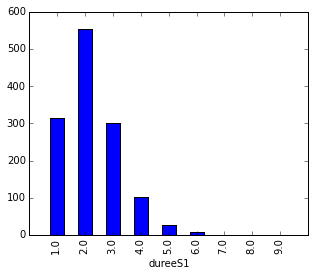

In [21]:
tableS1=pd.pivot_table(timeLine[["début","dureeS1"]],index="dureeS1",values="début",aggfunc="count")
ax=tableS1.plot(kind="bar",figsize=(5,4),ylim=(0,600),xlim=(-1,9))

## Distribution des durées de S1 en général dans MT1

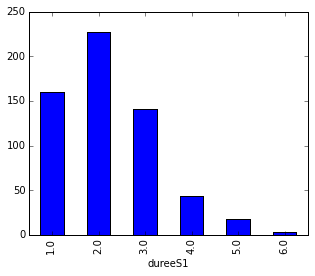

In [18]:
tableS1=pd.pivot_table(timeLine[timeLine["début"]<finMT1][["début","dureeS1"]],index="dureeS1",values="début",aggfunc="count")
tableS1.plot(kind="bar",figsize=(5,4))

## Distribution des durées de S1 en général dans MT2

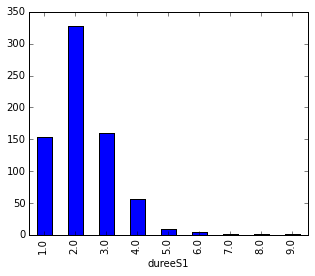

In [19]:
tableS1=pd.pivot_table(timeLine[timeLine["début"]>debutMT2][["début","dureeS1"]],index="dureeS1",values="début",aggfunc="count")
tableS1.plot(kind="bar",figsize=(5,4))

## Distribution des durées de S2 en général

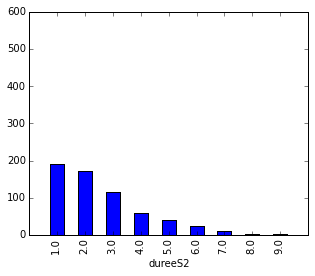

In [22]:
tableS2=pd.pivot_table(timeLine[["début","dureeS2"]],index="dureeS2",values="début",aggfunc="count")
tableS2.plot(kind="bar",figsize=(5,4),ylim=(0,600),xlim=(-1,9))

## Distribution des durées de S2 en général dans MT1

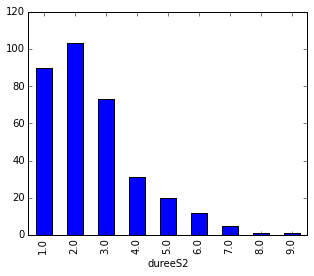

In [178]:
tableS2=pd.pivot_table(timeLine[timeLine["début"]<finMT1][["début","dureeS2"]],index="dureeS2",values="début",aggfunc="count")
tableS2.plot(kind="bar",figsize=(5,4))

## Distribution des durées de S2 en général dans MT2

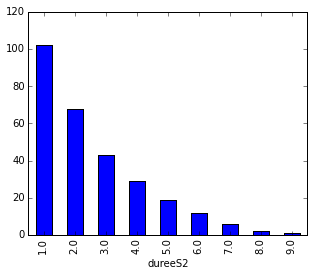

In [179]:
tableS2=pd.pivot_table(timeLine[timeLine["début"]>debutMT2][["début","dureeS2"]],index="dureeS2",values="début",aggfunc="count")
tableS2.plot(kind="bar",figsize=(5,4))